### Student Information
Name: 連音祺

Student ID: 111070005

GitHub ID: roseeea

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

---
# PART 1 : Lab 1 Master

## 1. the data

In [4]:
 # import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer 
import plotly as py
import math 
import PAMI 
import umap 
%matplotlib inline

# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [5]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

--- 
## 2. Data Preparation
### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [6]:
# Answer here
for text in twenty_train.data[:3]:
    print(text)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

--- 
## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [9]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
#pd.DataFrame.from_records(data, columns=None, index=None, exclude=None, coerce_float=False, nrows=None)
#data：數據來源，可以是字典的列表、元組的列表、陣列的列表等。
#根據每筆資料index設定col name (could be list[])

In [10]:
# add category to the dataframe
X['category'] = twenty_train.target
#twenty_train.target is a "list"

In [11]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
#apply : 對X(df)的 col(category)每個元素應用一個函數
#lanbda 匿名函數

### 3.2 Familiarizing yourself with the Data

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [12]:
#Answer here
#index->row, column-<col
import numpy as np

prac1 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd']) #Series is like dictionary
prac2 = pd.DataFrame(np.arange(25).reshape(5,5), index=list("abcde"), columns=list("abcde"))

print(prac1)
print(prac2)

print(prac1.loc[["a", "b"]])
print(prac2.loc[["a", "b"], ["c", "d"]])



a    10
b    20
c    30
d    40
dtype: int64
    a   b   c   d   e
a   0   1   2   3   4
b   5   6   7   8   9
c  10  11  12  13  14
d  15  16  17  18  19
e  20  21  22  23  24
a    10
b    20
dtype: int64
   c  d
a  2  3
b  7  8


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [13]:
# Answer here
print(X[X['category_name']=='sci.med'].iloc[::10][0:5])
#[::10] per every 10 data
#[0:5] first five

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


---
## 4. Data Mining using Pandas

### >>> **Exercise 4 (Watch Video):** 

In [14]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [15]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [16]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [18]:
# Answer here
# "None", "NaN" or "" still count as effective since it still has data form, 
# which is string
# missing value should be totally empty with no value at all

### 4.2 Dealing with Duplicate Data

### 4.2 Dealing with Duplicate Data

### 4.2 Dealing with Duplicate Data

---
## 5.  Data Preprocessing

### 5.1 Sampling

In [21]:
X_sample = X.sample(n=1000) #random state

---
### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [22]:
# Answer here
print(X[0:10])
print(X_sample[0:10])

print(len(X)," ", len(X_sample))

'''
the differences:
1. X index are with ascending order; X_sample are in random sequence
2. the length of X is still 2257, X_sample is 1000
'''

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci

'\nthe differences:\n1. X index are with ascending order; X_sample are in random sequence\n2. the length of X is still 2257, X_sample is 1000\n'

---

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

---
### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

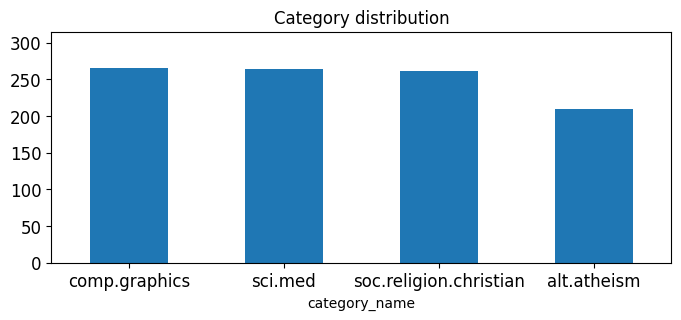

In [24]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()+50)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---
### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

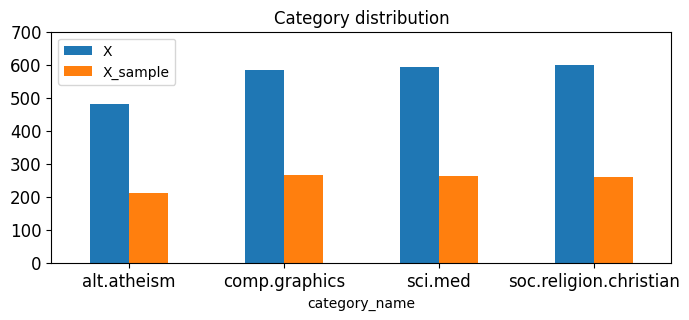

In [25]:
# Answer here

combined = pd.DataFrame({
    'X':X.category_name.value_counts(),
    'X_sample':X_sample.category_name.value_counts()})

combined.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, 700], 
        rot = 0, fontsize = 12, figsize = (8,3))

--- 
### 5.2 Feature Creation

In [26]:
import nltk
#nltk.download()

In [27]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
#針對 text 每一row，進行斷詞（tokenize）

---
### 5.3 Feature subset selection

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() #創建一個 文件-詞轉換矩陣“函數”
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
#CountVectorizer 提取text所有文本建立一個詞彙表(vacabulary) 與x是獨立，存於count＿vect中
print(X_counts[0]) #稀疏矩陣，只會列印出非零項目
#(0, 14887)	1 -> 文本樣本0裡 詞(index=14887)出現了1次 

  (np.int32(0), np.int32(14887))	1
  (np.int32(0), np.int32(29022))	1
  (np.int32(0), np.int32(8696))	4
  (np.int32(0), np.int32(4017))	2
  (np.int32(0), np.int32(33256))	2
  (np.int32(0), np.int32(21661))	3
  (np.int32(0), np.int32(9031))	3
  (np.int32(0), np.int32(31077))	1
  (np.int32(0), np.int32(9805))	2
  (np.int32(0), np.int32(17366))	1
  (np.int32(0), np.int32(32493))	4
  (np.int32(0), np.int32(16916))	2
  (np.int32(0), np.int32(19780))	2
  (np.int32(0), np.int32(17302))	2
  (np.int32(0), np.int32(23122))	1
  (np.int32(0), np.int32(25663))	1
  (np.int32(0), np.int32(16881))	1
  (np.int32(0), np.int32(16082))	1
  (np.int32(0), np.int32(23915))	1
  (np.int32(0), np.int32(32142))	5
  (np.int32(0), np.int32(33597))	2
  (np.int32(0), np.int32(20253))	1
  (np.int32(0), np.int32(587))	1
  (np.int32(0), np.int32(12051))	1
  (np.int32(0), np.int32(5201))	1
  :	:
  (np.int32(0), np.int32(25361))	1
  (np.int32(0), np.int32(25337))	1
  (np.int32(0), np.int32(12833))	2
  (np.int32(0), np.in

In [29]:
analyze = count_vect.build_analyzer() #生成分析函數
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---
### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [30]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---
### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [31]:
# Answer here
count_vect.get_feature_names_out()[37]

'01'

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

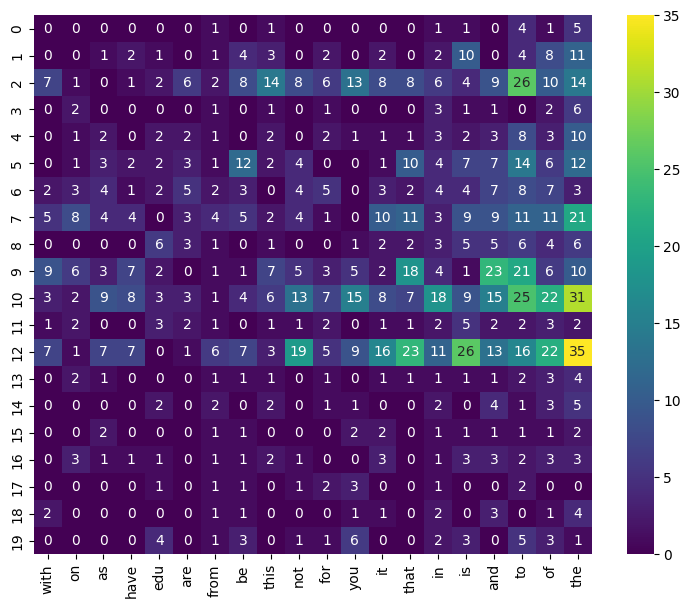

In [33]:
import seaborn as sns

# Answer here
frequency = X_counts.sum(axis=0).A1 #A1-> 1 dimen array
top_n=20
top_terms_indices = frequency.argsort()[-top_n:] #arrange and get top20
top_terms = count_vect.get_feature_names_out()[top_terms_indices]

sub = X_counts[:20, top_terms_indices].toarray()

df=pd.DataFrame(sub, columns=top_terms)
plt.subplots(figsize=(9, 7)) #figure size 9*7
ax = sns.heatmap(df, #data sources
                 cmap="viridis", #color
                 annot=True) 
plt.show()

---
### 5.4 Attribute Transformation / Aggregation

In [35]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    #sum 無法對sparse matrix 直接沿著軸進行求和（it will be like x[:, 1] + x[:, 1]...in matrix unit）

#other method : X_counts.sum(axis=0).A1
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [36]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] #1*feature size, [0] row

---
### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


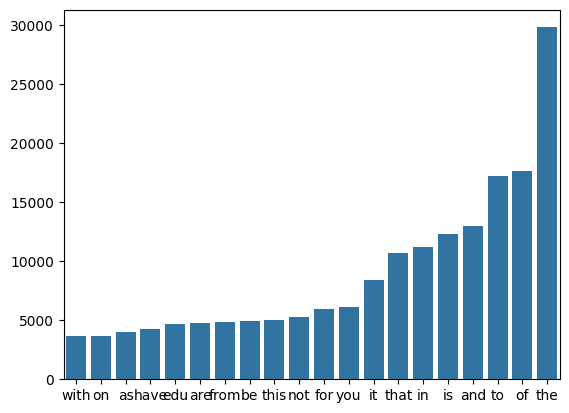

In [37]:
# Answer here
sub_freq = term_frequencies.argsort()[-20:] #index
sub_values = term_frequencies[sub_freq]
sub_name = count_vect.get_feature_names_out()[sub_freq]
g2 = sns.barplot(x=sub_name, 
            y=sub_values)

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


<Axes: xlabel='Rank', ylabel='Frequencies'>

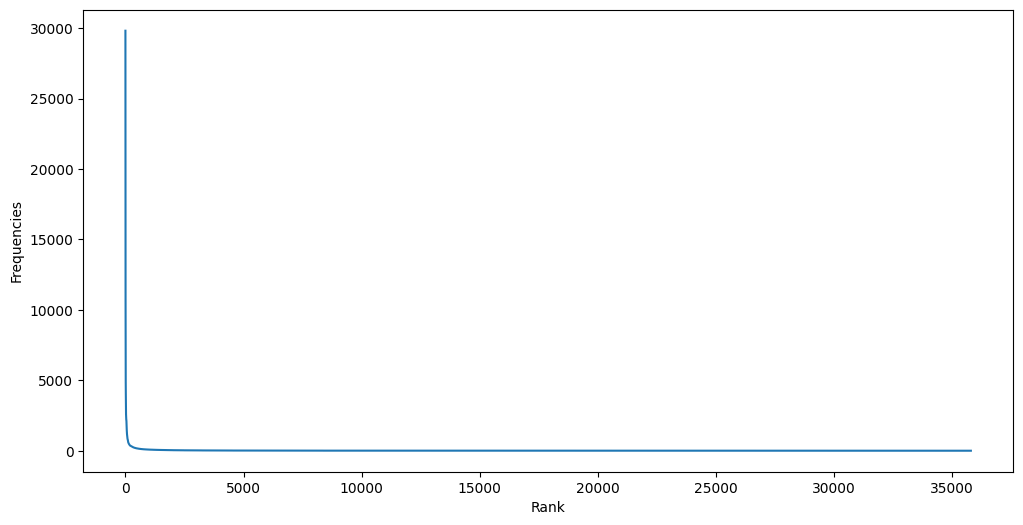

In [38]:
# Answer here
sorted_freq = np.sort(term_frequencies)[::-1] #[::-1] 變降續
df = pd.DataFrame(sorted_freq, columns=['Frequencies'])
df['Rank']=range(1, len(sorted_freq)+1) #[start, end) so +1

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Rank', y='Frequencies')
#plt.yscale('log')
#plt.xscale('log');


---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

'\ncompare to the graph without log transformation in 13, \nthe difference become less obvious since the value gap between values are not that big,\n\nconclusion:\nlog transformation is more suitable for the data set that have great differents among each sample\n'

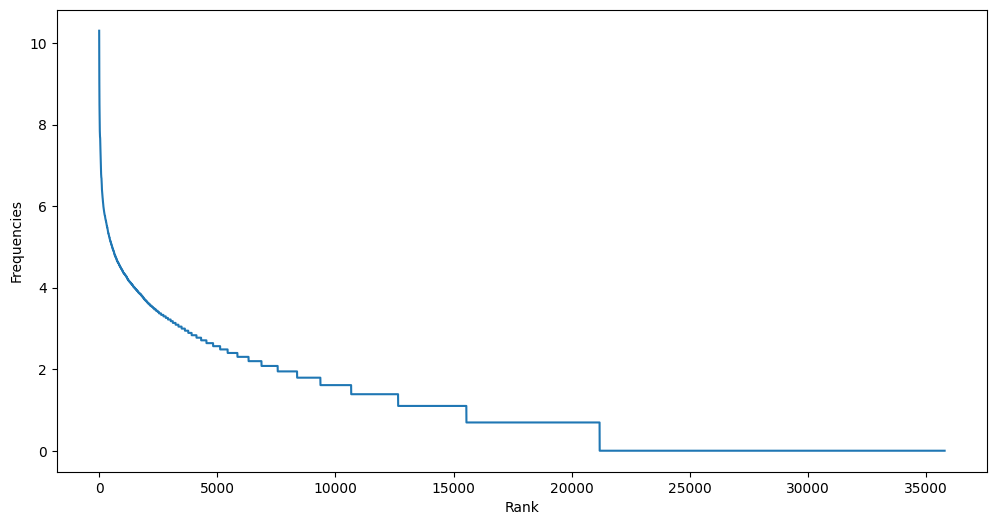

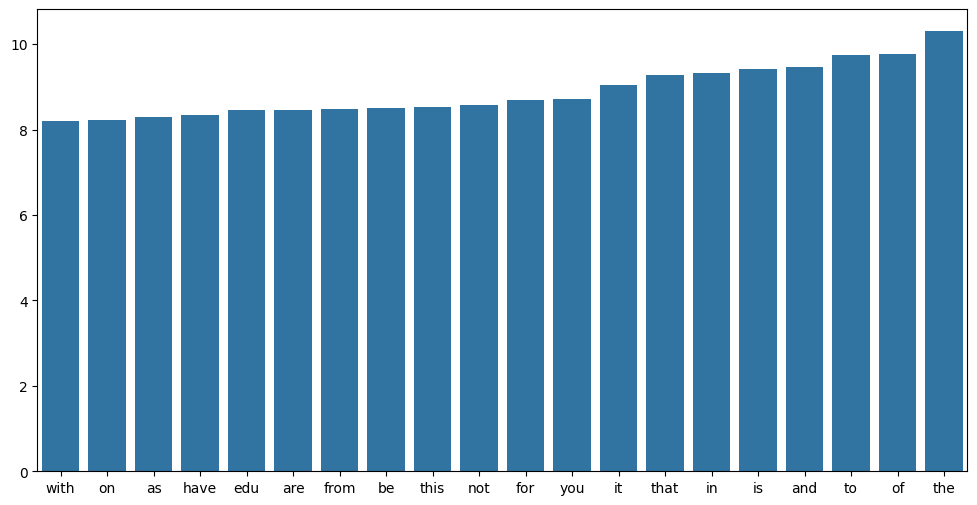

In [39]:
# Answer here
#from exercise 14
sorted_freq = np.sort(term_frequencies)[::-1] #[::-1] 變降續
sorted_freq_log = [math.log(i) for i in sorted_freq]
df = pd.DataFrame(sorted_freq_log, columns=['Frequencies'])
df['Rank']=range(1, len(sorted_freq)+1) #[start, end) so +1

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Rank', y='Frequencies')
#plt.yscale('log')
#plt.xscale('log');

'''
compare to the graph without log transformation in 14, 
the difference become clear and the descending trend is easier to observe.
'''

#from exercise 13
plt.figure(figsize=(12, 6))
sub_freq = term_frequencies.argsort()[-20:] #index, I test 20, 30, 50 amount of data
sub_values_log = [math.log(term_frequencies[i]) for i in sub_freq]
sub_name = count_vect.get_feature_names_out()[sub_freq]
g2 = sns.barplot(x=sub_name, 
            y=sub_values_log)

'''
compare to the graph without log transformation in 13, 
the difference become less obvious since the value gap between values are not that big,

conclusion:
log transformation is more suitable for the data set that have great differents among each sample
'''

---
###  Finding frequent patterns

In [40]:
## cell 97